In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
from os import listdir
from sklearn.cluster import KMeans
from PIL import Image
from numpy import asarray
from sklearn.manifold import TSNE
import random

### Đọc hình ảnh

In [2]:
def ReadImage(image):
    new_image = image.resize((10, 25))
    data = np.array(asarray(new_image))
    data_flat = data.flatten()
    return data_flat

### Mở hình ảnh

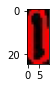

In [3]:
img= Image.open("Image digits/Trainset/0/image4.jpg")
new_image = img.resize((10, 25))
np_img = np.array(new_image)
img = Image.fromarray(np_img, 'RGB')
plt.figure(figsize = (1,1))
plt.imshow(img)

### Lấy DataTrain

In [4]:
def ReadFolder():
    images = []
    K = range(0, 10)
    for k in K:
        for index, fileName in enumerate(listdir('Image digits/Trainset/' + str(k))):
            filePath = 'Image digits/Trainset/'+ str(k) + '/' + fileName
            img = ReadImage(Image.open(filePath))
            images.append(img)
    images_np = np.array(images)
    return images_np

In [5]:
actress_np = ReadFolder()

In [11]:
actress_np

array([[32,  0,  0, ...,  7,  0,  0],
       [ 3,  0,  3, ...,  0, 10, 13],
       [ 6,  0,  0, ...,  0,  5, 11],
       ...,
       [19,  0,  6, ..., 29,  0,  0],
       [ 0, 22, 28, ...,  0,  4,  0],
       [ 1,  9,  7, ..., 72,  1,  1]], dtype=uint8)

### Phân cụm và train

In [12]:
k_means = KMeans(n_clusters=10, random_state = 100)
k_means.fit(actress_np)
pred_label = k_means.predict(actress_np)

In [13]:
# print(k_means.cluster_centers_.shape)
# print(actress_np)
print(type(k_means.cluster_centers_.T))
print(k_means.cluster_centers_.shape)
print(pred_label)

<class 'numpy.ndarray'>
(10, 750)
[5 5 5 ... 9 9 9]


### Lấy tất cả phần tử từ Clsuster

In [18]:
def getAllDataInCluster(cluster):
    B = actress_np[k_means.labels_== cluster]
    for i in range(0, B.shape[0]):
        cluster = B[i]
        imageFile = []
        arr1 = cluster.reshape(25, 30)
        K = range(0, 25)
        for k in K:
            newArr = arr1[k].reshape(10, 3)
            imageFile.append(newArr)
        newImg = np.array(imageFile)
        img = Image.fromarray(newImg, 'RGB')
    #     plt.figure(figsize = (1,1))
    #     plt.imshow(img)
        img.save('test/'+ str(i) + '.png')
getAllDataInCluster(7)


### Mỗi cluster lấy ra 1 giá trị ngẫu nhiên

In [49]:
def getDataCluster(cluster):
    x = random.randint(0,70)
    A = actress_np[k_means.labels_== cluster][x]
    return A

In [36]:
cluster_5 = getDataCluster(9)

In [37]:
# convert 1d array to 2d
imageFile = []
arr1 = cluster_5.reshape(25, 30)
K = range(0, 25)
for k in K:
    newArr = arr1[k].reshape(10, 3)
    imageFile.append(newArr)

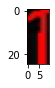

In [38]:
newImg = np.array(imageFile)
img = Image.fromarray(newImg, 'RGB')
plt.figure(figsize = (1,1))
plt.imshow(img)

In [50]:
def getDataMultiCluster():
    Index = range(0, 10)
    for idx in Index:
        cluster = getDataCluster(idx)
        imageFile = []
        arr1 = cluster.reshape(25, 30)
        K = range(0, 25)
        for k in K:
            newArr = arr1[k].reshape(10, 3)
            imageFile.append(newArr)
        # newImg = np.array(imageFile)
        # img = Image.fromarray(newImg, 'RGB')
        # plt.figure(figsize = (1,1))
        # plt.imshow(img)
        saveImageMultiCluster(imageFile, idx)
getDataMultiCluster()

In [40]:
def saveImage(imageFile, idx):
    newImg = np.array(imageFile)
    img = Image.fromarray(newImg, 'RGB')
#     plt.figure(figsize = (1,1))
#     plt.imshow(img)
    img.save('cluster/'+ str(idx) + '.png')

In [41]:
def saveImageMultiCluster(imageFile, idx):
    newImg = np.array(imageFile)
    img = Image.fromarray(newImg, 'RGB')
    img.save('multicluster/'+ str(idx) + '.png')

### Lấy 20 giá trị từ cluster

In [42]:
def getAllDataInCluster(cluster):
    A = actress_np[k_means.labels_== cluster]
    Index = range(0, 20)
    for idx in Index:
        cluster = A[idx]
        imageFile = []
        arr1 = cluster.reshape(25, 30)
        K = range(0, 25)
        for k in K:
            newArr = arr1[k].reshape(10, 3)
            imageFile.append(newArr)
        saveImage(imageFile, idx)
#         newImg = np.array(imageFile)
#         img = Image.fromarray(newImg, 'RGB')
#         plt.figure(figsize = (1,1))
#         plt.imshow(img)
#         img.save('2/my1.png')
    return

In [43]:
getAllDataInCluster(5)

In [44]:
# from PIL import Image
# def ReadCluster():
#     list_im = [
#         '/Users/trongpham/Desktop/ML/Image digits/Trainset/0/image4.jpg', 
#         '/Users/trongpham/Desktop/ML/Image digits/Trainset/1/image1.jpg', 
#         '/Users/trongpham/Desktop/ML/Image digits/Trainset/2/image13.jpg'
#     ]
#     imgs    = [ PIL.Image.open(i) for i in list_im ]
#     # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
#     min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
#     imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

#     # save that beautiful picture
#     imgs_comb = PIL.Image.fromarray( imgs_comb)
#     imgs_comb.show()

In [45]:
# list_im = []
# def ReadFolderCluster():
#     for index, fileName in enumerate(listdir('cluster')):
#         filePath = 'cluster/' + fileName
#         list_im.append(filePath)
#     return list_im

### Test với điểm cố định

In [46]:
learnedLabels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

8


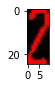

In [20]:
img = Image.open('Image digits/Trainset/2/image13.jpg')
def test(image):
    new_image = image.resize((10, 25))
    np_img = np.array(new_image)
    test = np.array([ReadImage(image)])
    predCluster = k_means.predict(test)[0]
    
    getAllDataInCluster(predCluster)

    img = Image.fromarray(np_img, 'RGB')
    plt.figure(figsize = (1,1))
    plt.imshow(img)
test(img)

### Test với tập testset

array([[  0,  17,  26, ...,   0,   6,  10],
       [253,   0,   0, ...,   0,  10,   6],
       [  9,   1,   0, ...,  62,   1,   0],
       ...,
       [ 26,   0,   1, ...,   0,   6,   8],
       [198,  26,  29, ...,   4,   0,   0],
       [  0,   7,   7, ...,  43,   0,   0]], dtype=uint8)

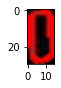

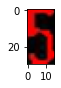

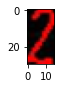

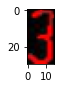

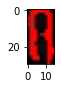

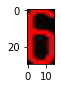

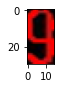

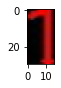

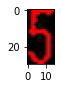

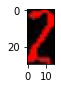

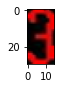

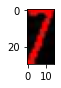

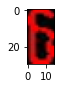

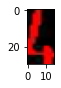

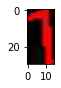

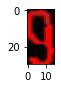

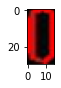

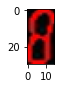

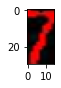

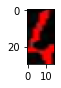

In [48]:
def ReadFolderTestSet():
    images = []
    for index, fileName in enumerate(listdir('Image digits/TestSet/')):
        filePath = 'Image digits/TestSet/' + fileName
        img = ReadImage(Image.open(filePath))
        images.append(img)
        open_img = Image.open('Image digits/TestSet/' + fileName)
        new_image = open_img.resize((15, 30))
        np_img_img = np.array(new_image)
        img = Image.fromarray(np_img_img, 'RGB')
        plt.figure(figsize = (1,1))
        plt.imshow(img)
    images_np = np.array(images)
    return images_np
ReadFolderTestSet()

### Đồ thị biểu diễn dữ liệu phân cụm và chưa phần cụm